# T09 Resampling
Dayanni Godoy Rosales

In [79]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_score
from skopt import BayesSearchCV
from skopt.space import Real
import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt


#### **1.- Utilizando propiedades básicas de la varianza, así como cálculo de una variable, deriva la ecuación (5.6).**

Utilizamos la propiedad fundamental de la varianza para la suma de variables aleatorias:$$Var(aX + bY) = a^2Var(X) + b^2Var(Y) + 2abCov(X,Y)$$

Sustituyendo $a = \alpha$ y $b = (1 - \alpha)$, obtenemos:$$f(\alpha) = \alpha^2 Var(X) + (1 - \alpha)^2 Var(Y) + 2\alpha(1 - \alpha) Cov(X, Y)$$

Para simplificar la notación, usaremos $\sigma_X^2 = Var(X)$, $\sigma_Y^2 = Var(Y)$ y $\sigma_{XY} = Cov(X, Y)$:


$$f(\alpha) = \alpha^2 \sigma_X^2 + (1 - \alpha)^2 \sigma_Y^2 + 2(\alpha - \alpha^2) \sigma_{XY}$$

**Paso 2: Derivación con respecto a $\alpha$**

Para encontrar el mínimo, necesitamos derivar la función con respecto a $\alpha$ y luego igualar a cero. Usamos cálculo de una variable:

$$\frac{d}{d\alpha} f(\alpha) = \frac{d}{d\alpha}[\alpha^2 \sigma_X^2] + \frac{d}{d\alpha}[(1 - \alpha)^2 \sigma_Y^2] + \frac{d}{d\alpha}[2(\alpha - \alpha^2) \sigma_{XY}]$$

Aplicamos la regla de la potencia y la regla de la cadena:

$$\frac{d}{d\alpha}(\alpha^2 \sigma_X^2) = 2\alpha \sigma_X^2$$

$$\frac{d}{d\alpha}((1 - \alpha)^2 \sigma_Y^2) = 2(1 - \alpha)(-1)\sigma_Y^2 = -2(1 - \alpha)\sigma_Y^2$$

$$\frac{d}{d\alpha}(2(\alpha - \alpha^2) \sigma_{XY}) = 2(1 - 2\alpha)\sigma_{XY}$$

Sumando los términos, tenemos la derivada completa:

$$\frac{df}{d\alpha} = 2\alpha \sigma_X^2 - 2(1 - \alpha)\sigma_Y^2 + 2(1 - 2\alpha)\sigma_{XY}$$



Paso 3: Optimización (Igualar a 0 y despejar)

Igualamos la derivada a 0 para encontrar el punto crítico:

$$2\alpha \sigma_X^2 - 2(1 - \alpha)\sigma_Y^2 + 2(1 - 2\alpha)\sigma_{XY} = 0$$

Podemos dividir toda la ecuación entre 2 para simplificar:

$$\alpha \sigma_X^2 - (1 - \alpha)\sigma_Y^2 + (1 - 2\alpha)\sigma_{XY} = 0$$

Expandimos los términos para agrupar las $\alpha$:

$$\alpha \sigma_X^2 - \sigma_Y^2 + \alpha \sigma_Y^2 + \sigma_{XY} - 2\alpha \sigma_{XY} = 0$$

Agrupamos todos los términos que contienen $\alpha$ en un lado y los constantes en el otro:

$$\alpha(\sigma_X^2 + \sigma_Y^2 - 2\sigma_{XY}) = \sigma_Y^2 - \sigma_{XY}$$

Finalmente, despejamos $\alpha$:

$$\alpha = \frac{\sigma_Y^2 - \sigma_{XY}}{\sigma_X^2 + \sigma_Y^2 - 2\sigma_{XY}}$$

El Bagging busca precisamente reducir esa covarianza entrenando modelos en subconjuntos de datos distintos (Bootstrap), lo que minimiza la varianza total del modelo ensamblado.

#### 2.- Ahora derivaremos la probabilidad de que una observación dada sea parte de una muestra de bootstrap. Supongamos que obtenemos una muestra de bootstrap de un conjunto de n observaciones.
(a) ¿Cuál es la probabilidad de que la primera observación de bootstrap no sea la j-ésima observación de la muestra original? Justifica tu respuesta.

- Tenemos $n$ observaciones en total.
- Al hacer Bootstrapping, seleccionamos una observación al azar con igual probabilidad (distribución uniforme).
- La probabilidad de seleccionar la observación específica $j$ es $\frac{1}{n}$.
- Por lo tanto, la probabilidad de no seleccionar esa observación $j$ es el complemento.

$$
P(1^{\text{ra}}\ \text{obs} \ne j) = 1 - \frac{1}{n}
$$

(b) ¿Cuál es la probabilidad de que la segunda observación de bootstrap no sea la j-ésima observación de la muestra original?

- La característica definitoria del Bootstrapping es que es un muestreo con reemplazo.
- Esto significa que, después de sacar la primera observación, la "devolvemos" a la bolsa. 
- Para la segunda extracción, seguimos teniendo $n$ observaciones disponibles.
- Las extracciones son independientes. Lo que pasó en la primera extracción no afecta a la segunda.

$$P(\text{2da obs} \neq j) = 1 - \frac{1}{n}$$

(c) Argumenta que la probabilidad de que la j-ésima observación no esté en la muestra de bootstrap es (1 − 1/n)ⁿ.

- La probabilidad de NO seleccionar la j-ésima observación en una sola extracción es (1−1/n).

- En el bootstrapping, realizamos n extracciones consecutivas y cada una es independiente de las demás (porque "reemplazamos" la observación en la urna antes de sacar la siguiente).

- Para calcular la probabilidad de que un evento independiente ocurra repetidamente n veces, multiplicamos su probabilidad por sí misma n veces.

- Por lo tanto, la probabilidad de que la observación j NO sea seleccionada en la primera, NI en la segunda... NI en la n-ésima extracción es:

$\underbrace{(1 - 1/n) \times (1 - 1/n) \times \cdots \times (1 - 1/n)}_{n \text{ veces}} = \left( 1 - \frac{1}{n} \right)^n$



(d) Cuando n = 5, ¿cuál es la probabilidad de que la j-ésima observación esté en la muestra de bootstrap?

In [18]:
n=5
1-(1-(1/n))**n

0.6723199999999999

(e) Cuando n = 100, ¿cuál es la probabilidad de que la j-ésima observación esté en la muestra de bootstrap?

In [19]:
n=100
1-(1-(1/n))**n

0.6339676587267709

(f) Cuando n = 10,000, ¿cuál es la probabilidad de que la j-ésima observación esté en la muestra de bootstrap?

In [20]:
n=10000
1-(1-(1/n))**n

0.6321389535670295

(g) Crea una gráfica que muestre, para cada valor entero de n desde 1 hasta 100,000, la probabilidad de que la j-ésima observación esté en la muestra de bootstrap. Comenta lo que observas.

<>:7: SyntaxWarning: invalid escape sequence '\i'
<>:7: SyntaxWarning: invalid escape sequence '\i'
C:\Users\dayan\AppData\Local\Temp\ipykernel_11780\2703577725.py:7: SyntaxWarning: invalid escape sequence '\i'
  plt.plot(n_range, probs, label='Probabilidad P(j $\in$ Bootstrap)', color='blue')


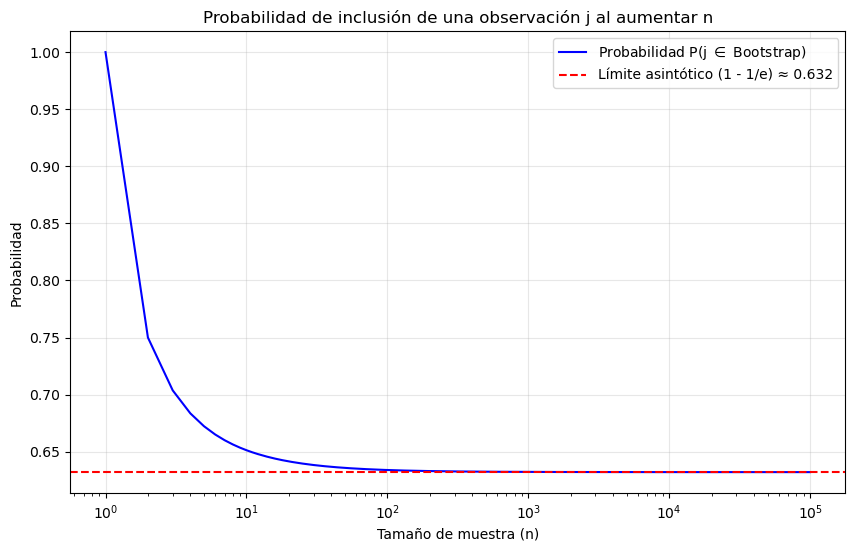

In [13]:
n_range = np.arange(1, 100001)

probs = 1 - (1 - 1/n_range)**n_range


plt.figure(figsize=(10, 6))
plt.plot(n_range, probs, label='Probabilidad P(j $\in$ Bootstrap)', color='blue')
plt.xscale('log') 
plt.axhline(y=1 - 1/np.e, color='red', linestyle='--', label=f'Límite asintótico (1 - 1/e) ≈ {1 - 1/np.e:.3f}')
plt.xlabel('Tamaño de muestra (n)')
plt.ylabel('Probabilidad')
plt.title('Probabilidad de inclusión de una observación j al aumentar n')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

(h) Ahora investigaremos numéricamente la probabilidad de que una muestra de bootstrap de tamaño n = 100 contenga la j-ésima observación. Aquí j = 4. Primero creamos un array de almacenamiento con valores que posteriormente serán sobrescritos usando la función np.empty(). Luego repetidamente creamos muestras de bootstrap, y cada vez registramos si la quinta observación está contenida en la muestra de bootstrap.
Comenta los resultados obtenidos.

In [ ]:
n = 100
j = 4  
n_simulaciones = 10000

store = np.empty(n_simulaciones)

rng = np.random.default_rng(seed=10)

for i in range(n_simulaciones):
    muestra = rng.choice(100, size=100, replace=True)
    store[i] = j in muestra

prob_simulada = np.mean(store)
prob_simulada

0.6362

Es casi el mismo resultado, .63.
Esto significa que, en muestras grandes, aproximadamente el 63.2% de los datos originales terminan en la muestra de entrenamiento, mientras que el 36.8% restante se queda fuera (Datos Out-of-Bag o OOB)

### 3. Ahora revisamos la validación cruzada de k pliegues (k-fold cross-validation).

**(a) Explica cómo se implementa la validación cruzada de k pliegues.** Básicamente divides aleatoriamente tu conjunto de datos en plieques del mismo tamaño, luego, iteras, el plieque actúa como prueba y así se va hasta k plieges, entrenándose con k-1. A sus predicciones les calculas el MSE, repites el proceso para k pliegues le sacas el promedio de los errores.

**(b) ¿Cuáles son las ventajas y desventajas de la validación cruzada de k pliegues en comparación con:**

i. ¿El enfoque de conjunto de validación (validation set approach)? 
Ventajas: En el Validation Set,usamos solo la mitad o el 70% de los datos para entrenar, esto hace que el Validation Set tienda a sobreestimar el error real. K-fold usa el 80% o 90% de los datos para entrenar, acercándose más al rendimiento real del modelo final.

Desventajas: Costo computacional.

ii. ¿La validación cruzada de dejar-uno-fuera (LOOCV)?
Ventajas: Costo computacional, lol.
Desventajas: LOOCV usa $n-1$ datos (casi todo el dataset) para entrenar, por lo que su sesgo es casi nulo. K-fold usa un poco menos, por lo que su estimación del error puede estar ligeramente sesgada hacia arriba en comparación con LOOCV.



### 4. 
Supongamos que utilizamos algún método de aprendizaje estadístico para hacer una predicción de la respuesta 
Y para un valor particular del predictor X. 

**Describe cuidadosamente cómo podríamos estimar la desviación estándar de nuestra predicción.**

Si solo tenemos un conjunto de dat.
os, podemos aplicar Bootstrap, donde:

1. Creas muestras de boostrap aleatorias y con reemplazo de cierto tamaño.
2. Ajustas un modelo para cada "nuevo" dataset.
3. Predices con cada modelo.
4. Le sacas la desviación estándar a cada predicción.

### 5. 

En el Capítulo 4, utilizamos regresión logística para predecir la probabilidad de incumplimiento (default) usando ingreso (income) y saldo (balance) en el conjunto de datos Default. Ahora estimaremos el error de prueba de este modelo de regresión logística utilizando el enfoque de conjunto de validación. No olvide establecer una semilla aleatoria antes de comenzar su análisis.

**(a) Ajuste un modelo de regresión logística que utilice ingreso y saldo para predecir incumplimiento.**


In [32]:
data = pd.read_csv("Defaultt.csv")

X = data[["balance", "income"]]
y = (data["default"] == "Yes").astype(int) 
model = LogisticRegression()
model.fit(X, y)
y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)
accuracy

0.9737

**(b) Utilizando el enfoque de conjunto de validación, estime el error de prueba de este modelo. Para hacer esto, debe realizar los siguientes pasos:**


In [ ]:

#i. Dividir el conjunto de muestras en un conjunto de entrenamiento y un conjunto de validación.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

#ii. Ajustar un modelo de regresión logística múltiple utilizando solo las observaciones de entrenamiento.
model = LogisticRegression()
model.fit(X_train, y_train)

#iii. Obtener una predicción del estado de incumplimiento para cada individuo en el conjunto de validación calculando la probabilidad posterior de incumplimiento para ese individuo, y clasificando al individuo en la categoría de incumplimiento si la probabilidad posterior es mayor que 0.5.
y_pred = model.predict(X_test)

#iv. Calcular el error del conjunto de validación, que es la fracción de observaciones en el conjunto de validación que se clasifican incorrectamente.
validation_error = 1 - accuracy_score(y_test, y_pred)
validation_error

0.025000000000000022

**(c) Repita el proceso en (b) tres veces, utilizando tres divisiones diferentes de las observaciones en un conjunto de entrenamiento y un conjunto de validación. Comente los resultados obtenidos.**

In [41]:
semillas = [2, 3, 4] 
lista_errores = []
for semilla in semillas:
    # Dividir con una semilla distinta cada vez
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=semilla)
    
    # Ajustar el modelo
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    # Predecir
    y_pred = model.predict(X_val)
    
    # Calcular error
    val_error = 1 - accuracy_score(y_val, y_pred)

    lista_errores.append(val_error)
lista_errores

[0.024800000000000044, 0.024800000000000044, 0.023800000000000043]

Observemos como casi no cambian los resultados, pero no son iguales.

**(d) Ahora considere un modelo de regresión logística que predice la probabilidad de incumplimiento usando ingreso, saldo y una variable dummy para estudiante. Estime el error de prueba para este modelo usando el enfoque de conjunto de validación. Comente si incluir una variable dummy para estudiante conduce o no a una reducción en la tasa de error de prueba.**

In [43]:
data['student_dummy'] = data['student'].map({'Yes': 1, 'No': 0})
y = (data['default'] == 'Yes').astype(int)

X_student = data[['balance', 'income', 'student_dummy']]

X_train, X_val, y_train, y_val = train_test_split(X_student, y, test_size=0.5, random_state=1)

model_student = LogisticRegression()
model_student.fit(X_train, y_train)

y_pred = model_student.predict(X_val)
val_error_student = 1 - accuracy_score(y_val, y_pred)
val_error_student


0.0262

El uso de una variable dummy no conduce a una reducción en la tasa de error de prueba.

### 6. 
Seguimos considerando el uso de un modelo de regresión logística para predecir la probabilidad de incumplimiento usando ingreso y saldo en el conjunto de datos Default. En particular, ahora calcularemos estimaciones para los errores estándar de los coeficientes de ingreso y saldo en la regresión logística de dos maneras diferentes: (1) usando el bootstrap, y (2) usando la fórmula estándar para calcular los errores estándar en la función sm.GLM(). No olvide establecer una semilla aleatoria antes de comenzar su análisis.

**(a) Usando las funciones summarize() y sm.GLM(), determine los errores estándar estimados para los coeficientes asociados con ingreso y saldo en un modelo de regresión logística múltiple que usa ambos predictores.**




In [ ]:
X_sm = data[['balance', 'income']]
X_sm = sm.add_constant(X_sm)  

modelo_sm = sm.GLM(y, X_sm, family=sm.families.Binomial()).fit()

print(modelo_sm.summary())

modelo_sm.bse

                 Generalized Linear Model Regression Results                  
Dep. Variable:                default   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9997
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -789.48
Date:                Fri, 28 Nov 2025   Deviance:                       1579.0
Time:                        18:36:23   Pearson chi2:                 6.95e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1256
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5405      0.435    -26.544      0.0

const      0.434772
balance    0.000227
income     0.000005
dtype: float64

**(b) Escriba una función, boot_fn(), que tome como entrada el conjunto de datos Default así como un índice de las observaciones, y que devuelva las estimaciones de los coeficientes para ingreso y saldo en el modelo de regresión logística múltiple.**

In [51]:
def boot_fn(datos, indices):
    muestra = datos.iloc[indices]
    
    X_boot = muestra[['balance', 'income']]
    y_boot = (muestra['default'] == 'Yes').astype(int)
    
    model_boot = LogisticRegression(solver='liblinear', C=1e10) 
    model_boot.fit(X_boot, y_boot)
    
    return np.concatenate([model_boot.intercept_, model_boot.coef_[0]])


(c) Siguiendo el ejemplo de bootstrap en el laboratorio, use su función boot_fn() para estimar los errores estándar de los coeficientes de regresión logística para ingreso y saldo.

In [ ]:

B = 1000 
n_observaciones = len(data)
bootstrap_results = []

np.random.seed(2)

for i in range(B):
    indices_bootstrap = np.random.choice(range(n_observaciones), size=n_observaciones, replace=True)
    coeficientes = boot_fn(data, indices_bootstrap)
    bootstrap_results.append(coeficientes)

bootstrap_results = np.array(bootstrap_results)

errores_estandar_boot = np.std(bootstrap_results, axis=0, ddof=1) 

nombres = ['Intercepto', 'Balance', 'Income']
for nombre, error in zip(nombres, errores_estandar_boot):
    print(f"{nombre}: {error:.6f}")

Intercepto: 0.000231
Balance: 0.000071
Income: 0.000004


**(d) Comente sobre los errores estándar estimados obtenidos usando la función sm.GLM() y usando el bootstrap.**

Se parecen pero no son iguales a los de summary()

### 7. 
En las Secciones 5.1.2 y 5.1.3, vimos que la función cross_validate() se puede usar para calcular el estimado del error de prueba LOOCV. Alternativamente, uno podría calcular esas cantidades usando solamente sm.GLM() y el método predict() del modelo ajustado dentro de un bucle for. Ahora tomarás este enfoque para calcular el error LOOCV para un modelo de regresión logística simple en el conjunto de datos Weekly. Recuerda que en el contexto de problemas de clasificación, el error LOOCV viene dado por (5.4).

(a) Ajusta un modelo de regresión logística que prediga Direction usando Lag1 y Lag2.

(b) Ajusta un modelo de regresión logística que prediga Direction usando Lag1 y Lag2 usando todas las observaciones excepto la primera.

(c)
Use el modelo de (b) para predecir la dirección de la primera observación. Puede hacer esto prediciendo que la primera observación subirá si $P(\text{Direction} = "\text{Up}" \mid \text{Lag1}, \text{Lag2}) > 0.5$. ¿Se clasificó correctamente esta observación?

(d)
Escriba un bucle for desde $i = 1$ hasta $i = n$, donde $n$ es el número de observaciones en el conjunto de datos, que realice cada uno de los siguientes pasos:

i. Ajustar un modelo de regresión logística usando todas las observaciones excepto la i-ésima para predecir Direction usando Lag1 y Lag2.

ii. Calcular la probabilidad posterior de que el mercado suba para la i-ésima observación.

iii. Usar la probabilidad posterior para la i-ésima observación para predecir si el mercado sube o no.

iv. Determinar si se cometió o no un error al predecir la dirección para la i-ésima observación. Si se cometió un error, indicar esto como un 1, y de lo contrario indicarlo como un 0.

(e) Toma el promedio de los n números obtenidos en (d)iv para obtener el estimado LOOCV para el error de prueba. Comenta sobre los resultados.


In [56]:
!pip install ISLP

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/3.6 MB ? eta -:--:--
   ---------------------------------- ----- 3.1/3.6 MB 18.5 MB/s eta 0:00:01
   ---------------------------------------- 3.6/3.6 MB 16.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/849.5 kB ? eta -:--:--
   --------------------------------------- 849.5/849.5 kB 18.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/983.2 kB ? eta -:--:--
   ---------------------------------------- 983.2/983.2 kB 9.2 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=159f4e191ee08dd483eb70c050e22b6034736b18fc98cc7d40bc07e2904f3a98
  Stored in directory: c:\users\dayan\appdata\local\pip\cache\wheels\50\37\21\0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma


In [60]:
from ISLP import load_data

Weekly = load_data('Weekly')

X = Weekly[['Lag1', 'Lag2']]
y = (Weekly['Direction'] == 'Up').astype(int)

print("Total de observaciones (n): " + str(len(Weekly)))

# Inciso (a) 
print("\nInciso (a)")
full_model = LogisticRegression(solver='liblinear', C=1e10)
full_model.fit(X, y)
print("Coeficientes: " + str(full_model.coef_))


# Inciso (b) 
print("\nInciso (b)")
X_no_first = X.iloc[1:]
y_no_first = y.iloc[1:]

model_b = LogisticRegression(solver='liblinear', C=1e10)
model_b.fit(X_no_first, y_no_first)


# Inciso (c) 
print("\nInciso (c)")
obs_primera_X = X.iloc[[0]]
obs_primera_y = y.iloc[0]

# Predecimos
prediccion_clase = model_b.predict(obs_primera_X)[0]
probabilidad = model_b.predict_proba(obs_primera_X)[0][1]

print("Probabilidad de 'Up' para obs #0: " + str(probabilidad))
print("Predicción del modelo (1=Up, 0=Down): " + str(prediccion_clase))
print("Valor Real: " + str(obs_primera_y))

if prediccion_clase == obs_primera_y:
    print("Conclusión: La observación fue clasificada CORRECTAMENTE.")
else:
    print("Conclusión: La observación fue clasificada INCORRECTAMENTE.")


#  Inciso (d) y (e):
print("\nInciso (d) y (e)")

errores = [] 
n = len(X)

for i in range(n):
    X_train = X.drop(index=i)
    y_train = y.drop(index=i)
    
    model_i = LogisticRegression(solver='liblinear', C=1e10)
    model_i.fit(X_train, y_train)
    
    pred_i = model_i.predict(X.iloc[[i]])[0]
    
    if pred_i != y.iloc[i]:
        errores.append(1)
    else:
        errores.append(0)

# (e) 
loocv_error = np.mean(errores)

print("Tasa de error LOOCV estimada: " + str(loocv_error))
print("Porcentaje de error: " + str(loocv_error * 100) + "%")

Total de observaciones (n): 1089

Inciso (a)
Coeficientes: [[-0.03872082  0.06024531]]

Inciso (b)

Inciso (c)
Probabilidad de 'Up' para obs #0: 0.5713910005857387
Predicción del modelo (1=Up, 0=Down): 1
Valor Real: 0
Conclusión: La observación fue clasificada INCORRECTAMENTE.

Inciso (d) y (e)
Tasa de error LOOCV estimada: 0.44995408631772266
Porcentaje de error: 44.995408631772264%


### 8. Ahora realizaremos validación cruzada en un conjunto de datos simulado.

**(a)** Genere un conjunto de datos simulado de la siguiente manera:


En este conjunto de datos, ¿qué es $n$ y qué es $p$? Escriba el modelo utilizado para generar los datos en forma de ecuación.

**(b)** Cree un diagrama de dispersión de $X$ contra $Y$. Comente lo que observe.

**(c)** Establezca una semilla aleatoria y luego calcule los errores LOOCV que resultan de ajustar los siguientes cuatro modelos usando mínimos cuadrados:

i. $Y = \beta_0 + \beta_1 X + \epsilon$

ii. $Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \epsilon$

iii. $Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon$

iv. $Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \beta_4 X^4 + \epsilon$

Nota: Puede ser útil usar la función `data.frame()` para crear un único conjunto de datos que contenga tanto $X$ como $Y$.

**(d)** Repita (c) usando otra semilla aleatoria e informe sus resultados. ¿Sus resultados son iguales a los obtenidos en (c)? ¿Por qué?

**(e)** ¿Cuál de los modelos en (c) tuvo el menor error LOOCV? ¿Es esto lo que esperaba? Explique su respuesta.

**(f)** Comente sobre la significancia estadística de las estimaciones de los coeficientes que resultan de ajustar cada uno de los modelos en (c) usando mínimos cuadrados. ¿Estos resultados coinciden con las conclusiones extraídas basándose en los resultados de la validación cruzada?



In [65]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

df = pd.DataFrame({'X': x, 'Y': y})

print("n: " + str(len(df)))
print("p: " + str(1))
print("Modelo: Y = X - 2X^2 + epsilon")

n: 100
p: 1
Modelo: Y = X - 2X^2 + epsilon


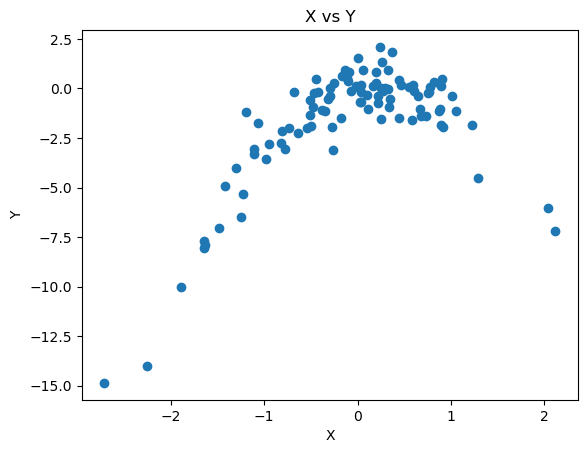

In [69]:
plt.scatter(df['X'], df['Y'])
plt.xlabel("X")
plt.ylabel("Y")
plt.title("X vs Y")
plt.show()

Se nota una clara relación cuadrática.

In [68]:
np.random.seed(2)

loo = LeaveOneOut()
model = LinearRegression()

for grado in range(1, 5):
    poly = PolynomialFeatures(degree=grado)
    X_poly = poly.fit_transform(df[['X']])
    
    scores = cross_val_score(model, X_poly, df['Y'], cv=loo, scoring='neg_mean_squared_error')
    mse = np.mean(np.abs(scores))
    
    print("Grado " + str(grado) + " MSE: " + str(mse))

Grado 1 MSE: 6.633029839181983
Grado 2 MSE: 1.122936856341968
Grado 3 MSE: 1.301796548935886
Grado 4 MSE: 1.3323942694179343


In [70]:
np.random.seed(100)

loo = LeaveOneOut()
model = LinearRegression()

for grado in range(1, 5):
    poly = PolynomialFeatures(degree=grado)
    X_poly = poly.fit_transform(df[['X']])
    
    scores = cross_val_score(model, X_poly, df['Y'], cv=loo, scoring='neg_mean_squared_error')
    mse = np.mean(np.abs(scores))
    
    print("Grado " + str(grado) + " MSE (Semilla 2): " + str(mse))

print("Los resultados son idénticos porque LOOCV es un método determinista (evalúa n veces), no hay aleatoriedad en la división de datos.")

Grado 1 MSE (Semilla 2): 6.633029839181983
Grado 2 MSE (Semilla 2): 1.122936856341968
Grado 3 MSE (Semilla 2): 1.301796548935886
Grado 4 MSE (Semilla 2): 1.3323942694179343
Los resultados son idénticos porque LOOCV es un método determinista (evalúa n veces), no hay aleatoriedad en la división de datos.


El modelo con menor error fue el modelo ii, esto era esperado porque los datos se generaron usando una ecuación cuadrática

In [71]:
poly_4 = PolynomialFeatures(degree=4)
X_poly_4 = poly_4.fit_transform(df[['X']])

model_sm = sm.OLS(df['Y'], X_poly_4).fit()

print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     200.2
Date:                Fri, 28 Nov 2025   Prob (F-statistic):           2.22e-45
Time:                        19:34:48   Log-Likelihood:                -137.74
No. Observations:                 100   AIC:                             285.5
Df Residuals:                      95   BIC:                             298.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1008      0.136      0.743      0.4

Los p-valores muestran que solo x1 y x2 son significativos.
Los términos x3 y x4 no son significativos, el error bajó mucho en grado 2 y no mejoró en 3 o 4.

### 9. Ahora consideraremos el conjunto de datos de viviendas de Boston, de la biblioteca ISLP.

**(a)** Basándose en este conjunto de datos, proporcione una estimación para la media poblacional de $\text{medv}$. Llame a esta estimación $\hat{\mu}$.

**(b)** Proporcione una estimación del error estándar de $\hat{\mu}$. Interprete este resultado.

*Pista: Podemos calcular el error estándar de la media muestral dividiendo la desviación estándar muestral por la raíz cuadrada del número de observaciones:*

$$SE(\hat{\mu}) = \frac{\sigma}{\sqrt{n}}$$

**(c)** Ahora estime el error estándar de $\hat{\mu}$ usando bootstrap. ¿Cómo se compara esto con su respuesta de (b)?

**(d)** Basándose en su estimación de bootstrap de (c), proporcione un intervalo de confianza del 95% para la media de medv. Compárelo con los resultados obtenidos al usar `Boston['medv'].std()` y la regla de los dos errores estándar (3.9).

*Pista: Puede aproximar un intervalo de confianza del 95% usando la fórmula:*

$$[\hat{\mu} - 2 \times SE(\hat{\mu}),\ \hat{\mu} + 2 \times SE(\hat{\mu})]$$

**(e)** Basándose en este conjunto de datos, proporcione una estimación, $\hat{\mu}_{med}$, para el valor mediano de medv en la población.

**(f)** Ahora nos gustaría estimar el error estándar de $\hat{\mu}_{med}$. Desafortunadamente, no existe una fórmula simple para calcular el error estándar de la mediana. En su lugar, estime el error estándar de la mediana usando bootstrap. Comente sus hallazgos.

**(g)** Basándose en este conjunto de datos, proporcione una estimación para el percentil décimo de medv en los sectores censales de Boston. Llame a esta cantidad $\hat{\mu}_{0.1}$. (Puede usar la función `np.percentile()`.)

**(h)** Use bootstrap para estimar el error estándar de $\hat{\mu}_{0.1}$. Comente sus hallazgos.

In [72]:
Boston = load_data('Boston')

mu_hat = Boston['medv'].mean()
print("Media estimada (mu_hat): " + str(mu_hat))

n = len(Boston)
se_hat = Boston['medv'].std() / np.sqrt(n)
print("Error Estándar (fórmula): " + str(se_hat))

Media estimada (mu_hat): 22.532806324110677
Error Estándar (fórmula): 0.4088611474975351


In [73]:
B = 1000
means = []
np.random.seed(1)

for i in range(B):
    sample = np.random.choice(Boston['medv'], size=n, replace=True)
    means.append(np.mean(sample))

boot_se_mean = np.std(means)
print("Error Estándar (Bootstrap): " + str(boot_se_mean))

Error Estándar (Bootstrap): 0.412402701271868


In [74]:
lower = mu_hat - 2 * boot_se_mean
upper = mu_hat + 2 * boot_se_mean

print("Intervalo de confianza 95%: [" + str(lower) + ", " + str(upper) + "]")

Intervalo de confianza 95%: [21.708000921566942, 23.35761172665441]


In [75]:
med_hat = Boston['medv'].median()
print("Mediana estimada: " + str(med_hat))

Mediana estimada: 21.2


In [76]:
medians = []
np.random.seed(1)

for i in range(B):
    sample = np.random.choice(Boston['medv'], size=n, replace=True)
    medians.append(np.median(sample))

boot_se_med = np.std(medians)
print("Error Estándar de la Mediana (Bootstrap): " + str(boot_se_med))

Error Estándar de la Mediana (Bootstrap): 0.3745979044255317


In [77]:
p10_hat = np.percentile(Boston['medv'], 10)
print("Percentil 10 estimado: " + str(p10_hat))

Percentil 10 estimado: 12.75


In [78]:
percentiles = []
np.random.seed(1)

for i in range(B):
    sample = np.random.choice(Boston['medv'], size=n, replace=True)
    percentiles.append(np.percentile(sample, 10))

boot_se_p10 = np.std(percentiles)
print("Error Estándar del Percentil 10 (Bootstrap): " + str(boot_se_p10))

Error Estándar del Percentil 10 (Bootstrap): 0.48836343024432116


Al comparar los resultados notamos que si se parecen. 